In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('trat_estab_082022.csv')

In [3]:
df.head()

,ds_nome_estabelecimento_tratado,calibrar
0,EBW *SHOPEE,154
1,99*99PAY,137
2,AME*AMERICANASCOM,130
3,EBW *SHEIN,92
4,99*99PAY,89


In [4]:
estabelecimentos = pd.Series(df['ds_nome_estabelecimento_tratado'])
weights = pd.Series(df['calibrar'])
estabelecimentos_w = estabelecimentos.repeat(weights)
len(estabelecimentos_w)

10019

In [9]:
dfw = pd.DataFrame()
dfw['estabelecimentos'] = estabelecimentos_w

In [10]:
dfw['estabelecimentos'] = dfw['estabelecimentos'].str.lower()

In [11]:
dfw.head()

,estabelecimentos
0,ebw *shopee
0,ebw *shopee
0,ebw *shopee
0,ebw *shopee
0,ebw *shopee


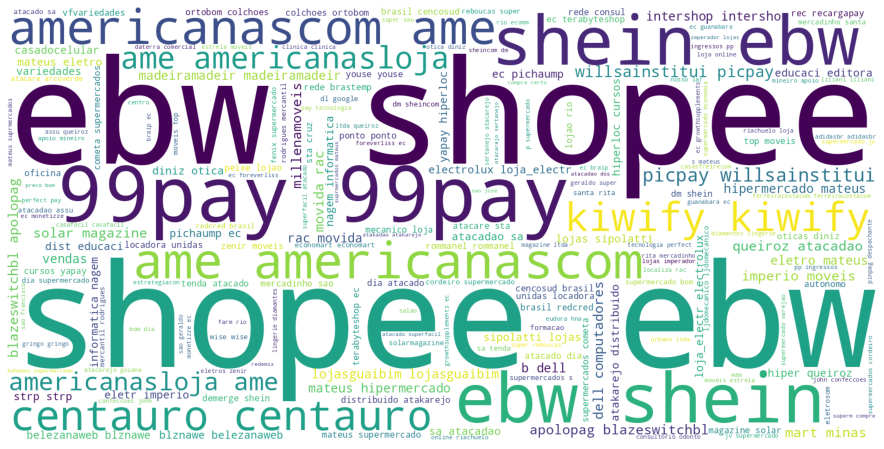

In [21]:
estabelecimentos = dfw[dfw['estabelecimentos'].notnull()]['estabelecimentos']

all_other = " ".join(s for s in estabelecimentos)

stopwords = set(STOPWORDS)
pstop = ["da", "meu", "em", "você", "de", "ao", "os", "que", "e", 'eu', 'o', 'estou', '*','pag' , 'do', 'e', 'novo', 'a', 'mp', 'pg', 'zp']
stopwords.update(pstop)

wordcloud = WordCloud(stopwords=stopwords,
                      max_font_size = 300,
                      background_color='white', width=1600,                            
                      height=800).generate(all_other)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

In [38]:
print(wordcloud)

In [39]:
pstop = ["da", "meu", "em", "você", "de", "ao", "os", "que", "e", 'eu', 'o', 'estou', 'pag' , 'do', 'e', 'novo', 'a', 'mp', 'pg', 'zp']

dfw_clean['estabelecimentos'] = all_other
#dfw_clean = dfw_clean[~dfw_clean['estabelecimentos'].isin(pstop)]

In [40]:
cont = dfw_clean['estabelecimentos'].str.split(expand=True).stack().value_counts().reset_index(name="count")

In [41]:
cont.head(30)

,index,count
